In [1]:
%%javascript
require.config({ 
    paths: { 
    d3: 'https://d3js.org/d3.v7.min'
}});

require(["d3"], function(d3) {
    window.d3 = d3;
});

<IPython.core.display.Javascript object>

In [2]:
import sparg
import tskit
import numpy as np
import tskit_arg_visualizer as viz
import matplotlib.pyplot as plt
import math


ts = tskit.load("QE/slim/slim_0.25rep4sigma.trees")
keep_nodes = list(np.random.choice(ts.samples(), 10, replace=False))
ts_sim = ts.simplify(samples=keep_nodes, keep_input_roots=False, keep_unary=True)
ts_final, maps =  sparg.remove_excess_nodes(ts_sim)
ts_final = sparg.merge_roots(ts_final)

In [267]:
paths = sparg.identify_unique_paths(ts=ts_final)

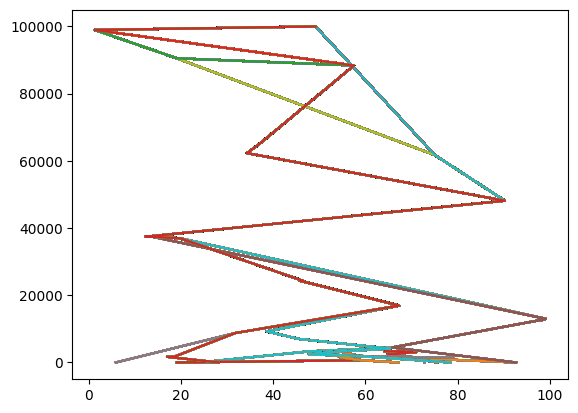

In [268]:
for path in paths:
    locations = []
    times = []
    for node in path:
        locations.append(ts_final.individual(ts_final.node(node).individual).location[0])
        times.append(ts_final.node(node).time)
    plt.plot(locations, times)
plt.show()

In [276]:
viz.D3ARG(ts=ts_final).draw(width=750, height=1000, edge_type="ortho", y_axis_scale="rank")

In [257]:
dispersal_rate, cov_mat, paths, locations_of_nodes, variances_in_node_locations = sparg.estimate_spatial_parameters(ts=ts_final)

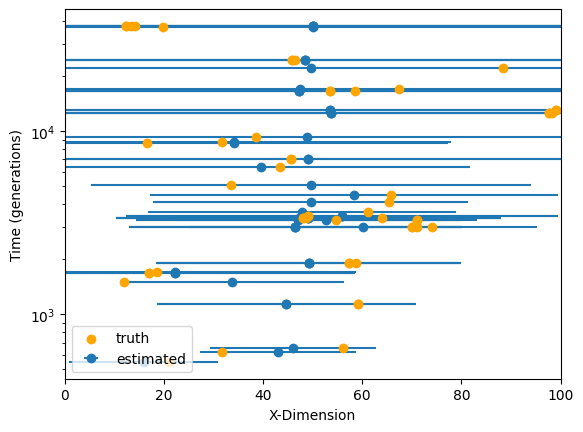

In [263]:
true_locs = []
estimated_locs = []
times = []
errors = []
ranks = []
unique_times = list(np.unique(ts_final.tables.nodes.time))
for node in ts_final.nodes():
    if node.time <= 37545:
        true_locs.append(ts_final.individual(node.individual).location[0])
        estimated_locs.append(locations_of_nodes[node.id][0])
        times.append(node.time)
        ranks.append(unique_times.index(node.time))
        errors.append(2*math.sqrt(round(variances_in_node_locations[node.id][0][0])))
plt.errorbar(estimated_locs, times, xerr=errors, label="estimated", fmt="o", zorder=1)
plt.scatter(true_locs, times, color="orange", label="truth", zorder=2)
plt.yscale("log")
plt.legend(loc="lower left")
plt.xlim(0, 100)
plt.xlabel("X-Dimension")
plt.ylabel("Time (generations)")
plt.show()

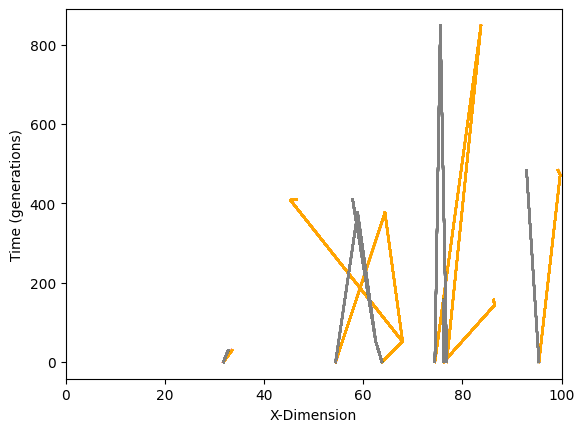

In [250]:
for path in paths:
    locations = []
    times = []
    for node in path:
        if ts_final.node(node).time <= 1000:
            locations.append(ts_final.individual(ts_final.node(node).individual).location[0])
            times.append(ts_final.node(node).time)
    plt.plot(locations, times, color="orange")

unique_times = list(np.unique(ts_final.tables.nodes.time))
for p in paths:
    p_time = []
    p_rank = []
    p_locs = []
    p_error = []
    for n in p:
        if ts_final.node(n).time <= 1000:
            p_time.append(ts_final.node(n).time)
            p_rank.append(unique_times.index(ts_final.node(n).time))
            p_locs.append(locations_of_nodes[n][0])
            p_error.append(2*math.sqrt(round(variances_in_node_locations[n][0][0])))    # Error is two standard deviations (95% confidence interval)
    plt.plot(p_locs, p_time, color="grey")
plt.xlim(0, 100)
plt.xlabel("X-Dimension")
plt.ylabel("Time (generations)")
plt.show()

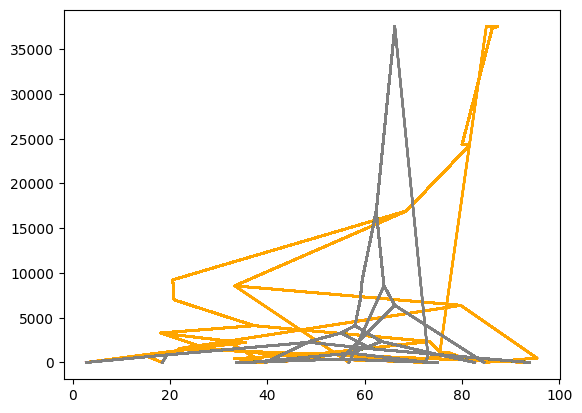

In [239]:
for path in paths:
    locations = []
    times = []
    for node in path:
        if ts_final.node(node).time <= 37545:
            locations.append(ts_final.individual(ts_final.node(node).individual).location[1])
            times.append(ts_final.node(node).time)
    plt.plot(locations, times, color="orange")

unique_times = list(np.unique(ts_final.tables.nodes.time))
for p in paths:
    p_time = []
    p_rank = []
    p_locs = []
    p_error = []
    for n in p:
        if ts_final.node(n).time <= 37545:
            p_time.append(ts_final.node(n).time)
            p_rank.append(unique_times.index(ts_final.node(n).time))
            p_locs.append(locations_of_nodes[n][1])
            p_error.append(2*math.sqrt(round(variances_in_node_locations[n][1][1])))    # Error is two standard deviations (95% confidence interval)
    plt.plot(p_locs, p_time, color="grey")

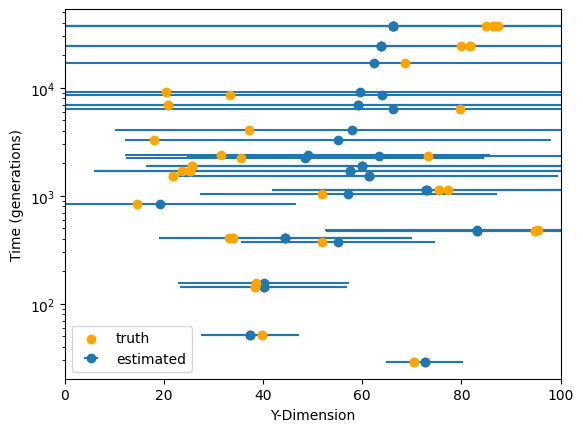

In [252]:
true_locs = []
estimated_locs = []
times = []
errors = []
ranks = []
for node in ts_final.nodes():
    if node.time <= 37545:
        true_locs.append(ts_final.individual(node.individual).location[1])
        estimated_locs.append(locations_of_nodes[node.id][1])
        times.append(node.time)
        ranks.append(unique_times.index(node.time))
        errors.append(2*math.sqrt(round(variances_in_node_locations[node.id][1][1])))
plt.errorbar(estimated_locs, times, xerr=errors, label="estimated", fmt="o", zorder=1)
plt.scatter(true_locs, times, color="orange", label="truth", zorder=2)
plt.yscale("log")
plt.legend(loc="lower left")
plt.xlim(0, 100)
plt.xlabel("Y-Dimension")
plt.ylabel("Time (generations)")
plt.show()

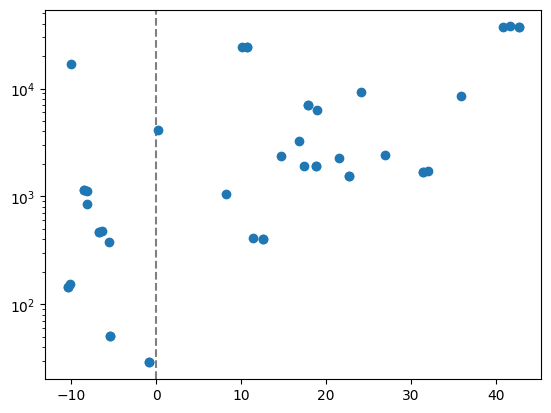

In [189]:
residuals = []
times = []
ranks = []
values = []
unique_times = list(np.unique(ts_final.tables.nodes.time))
plt.axvline(x=0, linestyle="--", color="grey", zorder=1)
for node in ts_final.nodes():
    if node.time <= 37545:
        residuals.append(locations_of_nodes[node.id][0] - ts_final.individual(node.individual).location[0])
        times.append(ts_final.node(node.id).time)
        ranks.append(unique_times.index(ts_final.node(node.id).time))
        values.append(locations_of_nodes[node.id][0])
plt.scatter(residuals, times)
plt.yscale("log")

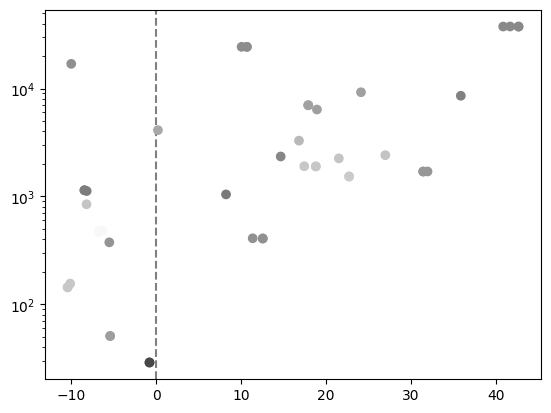

In [190]:
residuals = []
times = []
ranks = []
values = []
unique_times = list(np.unique(ts_final.tables.nodes.time))
plt.axvline(x=0, linestyle="--", color="grey", zorder=1)
for node in ts_final.nodes():
    if node.time <= 37545:
        residuals.append(locations_of_nodes[node.id][0] - ts_final.individual(node.individual).location[0])
        times.append(ts_final.node(node.id).time)
        ranks.append(unique_times.index(ts_final.node(node.id).time))
        values.append(locations_of_nodes[node.id][0])
plt.scatter(residuals, times, c=values)
plt.yscale("log")



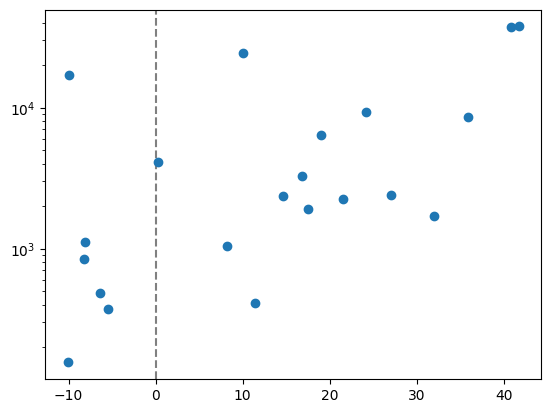

In [161]:
residuals = []
times = []
ranks = []
unique_times = list(np.unique(ts_final.tables.nodes.time))
plt.axvline(x=0, linestyle="--", color="grey", zorder=1)
for node in ts_final.nodes():
    if node.flags != 131072 and node.flags != 262144 and node.time <= 37545:
        residuals.append(locations_of_nodes[node.id][0] - ts_final.individual(ts_final.node(node.id).individual).location[0])
        times.append(ts_final.node(node.id).time)
        ranks.append(unique_times.index(ts_final.node(node.id).time))
plt.scatter(residuals, times)
plt.yscale("log")

In [191]:
ts_simplified = ts_final.simplify()
simplified_paths = sparg.identify_unique_paths(ts=ts_simplified)
wohns_locations_of_nodes = sparg.calc_alternate_node_locations(ts=ts_simplified, weighted=False)
felsenstein_locations_of_nodes = sparg.calc_alternate_node_locations(ts=ts_simplified)

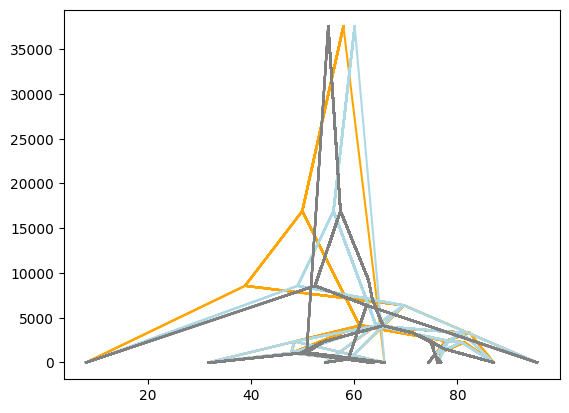

In [194]:
unique_times = list(np.unique(ts_simplified.tables.nodes.time))
for p in simplified_paths:
    p_time = []
    p_rank = []
    p_wlocs = []
    p_flocs = []
    p_error = []
    for n in p:
        p_time.append(ts_simplified.node(n).time)
        p_rank.append(unique_times.index(ts_simplified.node(n).time))
        p_wlocs.append(wohns_locations_of_nodes[n][0])
        p_flocs.append(felsenstein_locations_of_nodes[n][0])
        plt.plot(p_wlocs, p_time, color="orange", zorder=1)
        plt.plot(p_flocs, p_time, color="lightblue", zorder=2)

unique_times = list(np.unique(ts_final.tables.nodes.time))
for p in paths:
    p_time = []
    p_rank = []
    p_locs = []
    p_error = []
    for n in p:
        if ts_final.node(n).time <= 37545:
            p_time.append(ts_final.node(n).time)
            p_rank.append(unique_times.index(ts_final.node(n).time))
            p_locs.append(locations_of_nodes[n][0])
            p_error.append(2*math.sqrt(round(variances_in_node_locations[n][0][0])))    # Error is two standard deviations (95% confidence interval)
    plt.plot(p_locs, p_time, color="grey", zorder=3)

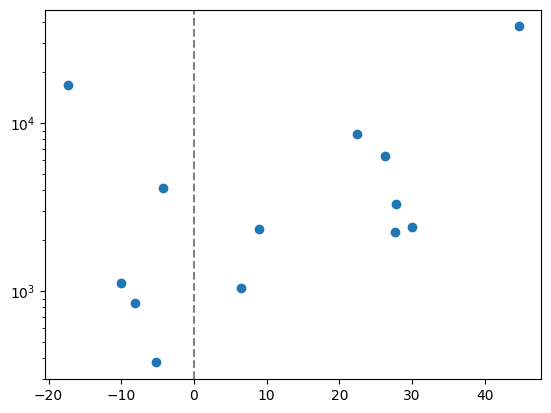

In [133]:
residuals = []
times = []
ranks = []
unique_times = list(np.unique(ts_simplified.tables.nodes.time))
plt.axvline(x=0, linestyle="--", color="grey", zorder=1)
for node in ts_simplified.nodes():
    residuals.append(wohns_locations_of_nodes[node.id][0] - ts_simplified.individual(ts_simplified.node(node.id).individual).location[0])
    times.append(ts_simplified.node(node.id).time)
    ranks.append(unique_times.index(ts_simplified.node(node.id).time))
plt.scatter(residuals, times)
plt.yscale("log")

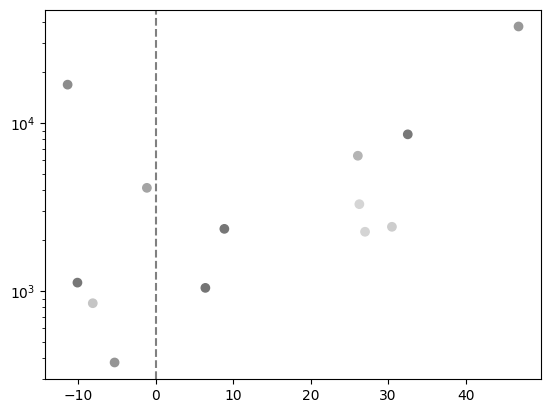

In [181]:
residuals = []
times = []
ranks = []
values = []
unique_times = list(np.unique(ts_simplified.tables.nodes.time))
plt.axvline(x=0, linestyle="--", color="grey", zorder=1)
for node in ts_simplified.nodes():
    residuals.append(felsenstein_locations_of_nodes[node.id][0] - ts_simplified.individual(ts_simplified.node(node.id).individual).location[0])
    times.append(ts_simplified.node(node.id).time)
    ranks.append(unique_times.index(ts_simplified.node(node.id).time))
    values.append(felsenstein_locations_of_nodes[node.id][0])
plt.scatter(residuals, times, c=values)
plt.yscale("log")

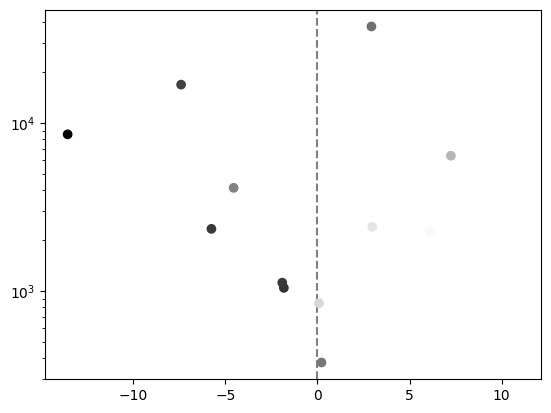

In [182]:
residuals = []
times = []
ranks = []
values = []
unique_times = list(np.unique(ts_simplified.tables.nodes.time))
plt.axvline(x=0, linestyle="--", color="grey", zorder=1)
for node in ts_simplified.nodes():
    if node.time != 0:
        residuals.append(wohns_locations_of_nodes[node.id][0] - locations_of_nodes[np.where(ts_final.tables.nodes.time==node.time)[0][0]][0])
        times.append(ts_simplified.node(node.id).time)
        ranks.append(unique_times.index(ts_simplified.node(node.id).time))
        values.append(wohns_locations_of_nodes[node.id][0])
plt.scatter(residuals, times, c=values)
plt.yscale("log")

In [ ]:
ts = tskit.load("QE/slim/slim_0.25rep4sigma.trees")

for i in range(5):
    keep_nodes = list(np.random.choice(ts.samples(), 10, replace=False))
    print(keep_nodes)
    ts_sim = ts.simplify(samples=keep_nodes, keep_input_roots=False, keep_unary=True)
    ts_final, maps =  sparg.remove_excess_nodes(ts_sim)
    ts_final = sparg.merge_roots(ts_final)
    ts_cut = sparg.cut_ts_at_gmrca(ts=ts)
    print(len(ts_cut.tables.nodes))
    dispersal_rate, cov_mat, paths, locations_of_nodes, variances_in_node_locations = sparg.estimate_spatial_parameters(ts=ts_cut)
    print(dispersal_rate)
    

[14889, 7658, 9160, 12828, 14182, 12034, 12750, 3018, 13406, 2886]
16365


In [6]:
ts_diff, maps_diff = sparg.remove_excess_nodes(ts)
ts_diff = sparg.merge_roots(ts_diff)
ts_cut = sparg.cut_ts_at_gmrca(ts=ts_diff)
print(len(ts_cut.tables.nodes))

29137


In [7]:
print(len(ts_diff.tables.nodes))

29149


In [10]:
print(ts_diff.num_samples)

16364


In [24]:
keep_nodes = list(np.random.choice(ts.samples(), 2, replace=False))
print(keep_nodes)
ts_sim = ts.simplify(samples=keep_nodes, keep_input_roots=False, keep_unary=True)
ts_sim_cut = sparg.cut_ts_at_gmrca(ts=ts_sim)

[13500, 14911]


RecursionError: maximum recursion depth exceeded in comparison

In [20]:
dispersal_rates = np.loadtxt("QE/slim/slim_0.25rep4sigma_dispersalrateestimates.txt")

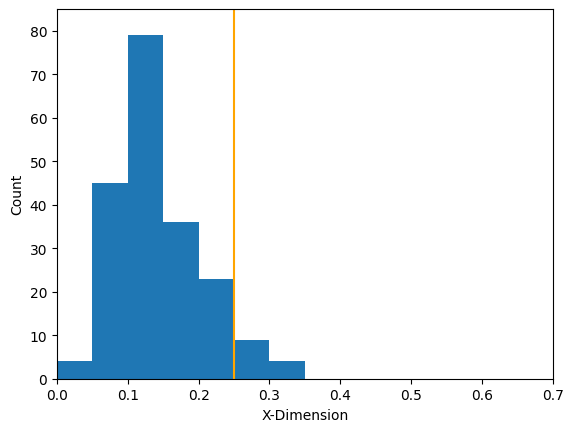

In [43]:
plt.hist(dispersal_rates[:,0], bins=[i/100 for i in range(0, 70, 5)])
plt.axvline(0.25, color="orange")
plt.xlabel("X-Dimension")
plt.ylabel("Count")
plt.ylim(0,85)
plt.xlim(0,0.7)
plt.show()

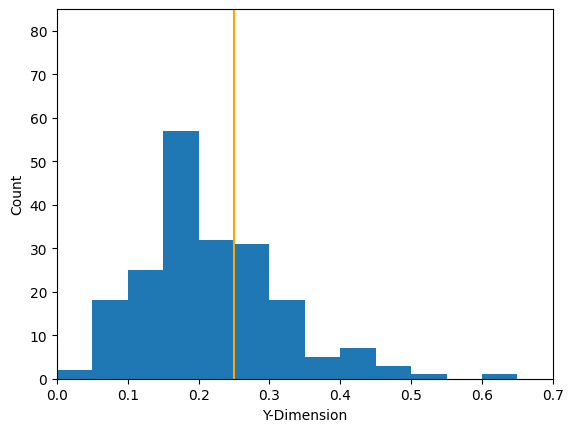

In [44]:
plt.hist(dispersal_rates[:,1], bins=[i/100 for i in range(0, 70, 5)])
plt.axvline(0.25, color="orange")
plt.xlabel("Y-Dimension")
plt.ylabel("Count")
plt.ylim(0,85)
plt.xlim(0,0.7)
plt.show()

In [25]:
np.median(dispersal_rates[:,1])

0.19705906753630148

In [26]:
np.median(dispersal_rates[:,0])

0.126289495929631